## Working Environment 
- Operation System : Ubuntu 18.04 LTS
- Graphic : NVIDIA GeForce GTX 1080(Version 418.67)
- coding operation : Jupyter Lab(Version 0.35.4)
 
## Libray Version
- Tensorflow GPU : 1.11.0
- Pandas : 0.23.4
- Numpy : 1.16.0
- Matplotlib : 3.0.2
- Missingno : 0.4.1
- Seaborn : 0.9.0
- Scipy : 1.2.0
- Sklearn : 0.18

## Maintainer 
- dgkim1108@gwnu.ac.kr

## Last Modified
- 2019.07.19

# 1. Library

In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')
import tensorflow as tf
from tensorflow.python.client import device_lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5,
              shuffle = True,
              random_state = 0) # Cross-Validation
values = [0.001, 0.01, 0.1, 1, 10, 100]

# Machine Algorithm
from sklearn.linear_model import LogisticRegression             # 1
from sklearn.svm import SVC                                     # 2
from sklearn.linear_model import Perceptron                     # 3
from sklearn.neural_network import MLPClassifier                # 4
from sklearn.tree import DecisionTreeClassifier                 # 5
from sklearn.naive_bayes import GaussianNB                      # 6
from sklearn.linear_model import SGDClassifier                  # 7
from sklearn.neighbors import KNeighborsClassifier              # 8
from sklearn.ensemble import RandomForestClassifier             # 9
from sklearn.ensemble import GradientBoostingClassifier         # 10
from sklearn.ensemble import AdaBoostClassifier                 # 11
from sklearn.ensemble import ExtraTreesClassifier               # 12
from xgboost import XGBClassifier                               # 13

# 2. NVIDIA GPU Driver

In [2]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 519096010686231564
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6703472968
locality {
  bus_id: 1
}
incarnation: 2668455275099515439
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
tf.device('/device:GPU:0')

# 3. Data

In [4]:
pd_train = pd.read_csv('data/train.csv')
pd_test = pd.read_csv('data/test.csv')

print('Train Dataset has {} Samples and {} Attributes'.format(*pd_train.shape))
print('Test Dataset has {} Samples and {} Attributes'.format(*pd_test.shape))

Train Dataset has 891 Samples and 12 Attributes
Test Dataset has 418 Samples and 11 Attributes


In [5]:
pd_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
pd_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
pd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
pd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# 4. Exploratory Data Analysis(EDA)

### 4.1 Example of a Pclass' Survival Rate

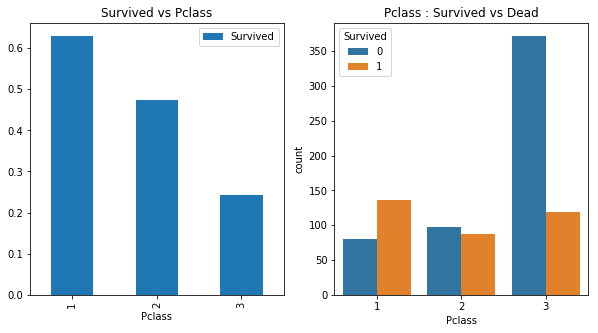

In [9]:
x, y = plt.subplots(1,
                    2,
                    figsize = (10, 5))
pd_train[['Pclass',
          'Survived']].groupby(['Pclass']).mean().plot.bar(ax = y[0])
y[0].set_title('Survived vs Pclass')
sns.countplot('Pclass',
              hue = 'Survived',
              data = pd_train,
              ax = y[1])
y[1].set_title('Pclass : Survived vs Dead')
plt.show()

### 4.2 Example of a Sex' Survival Rate

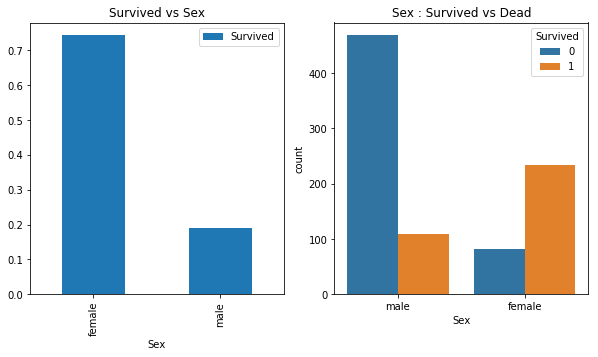

In [10]:
x, y = plt.subplots(1,
                    2,
                    figsize = (10, 5))
pd_train[['Sex',
          'Survived']].groupby(['Sex']).mean().plot.bar(ax = y[0])
y[0].set_title('Survived vs Sex')
sns.countplot('Sex',
              hue = 'Survived',
              data = pd_train,
              ax = y[1])
y[1].set_title('Sex : Survived vs Dead')
plt.show()

### 4.3 Example of training Data Missing Values

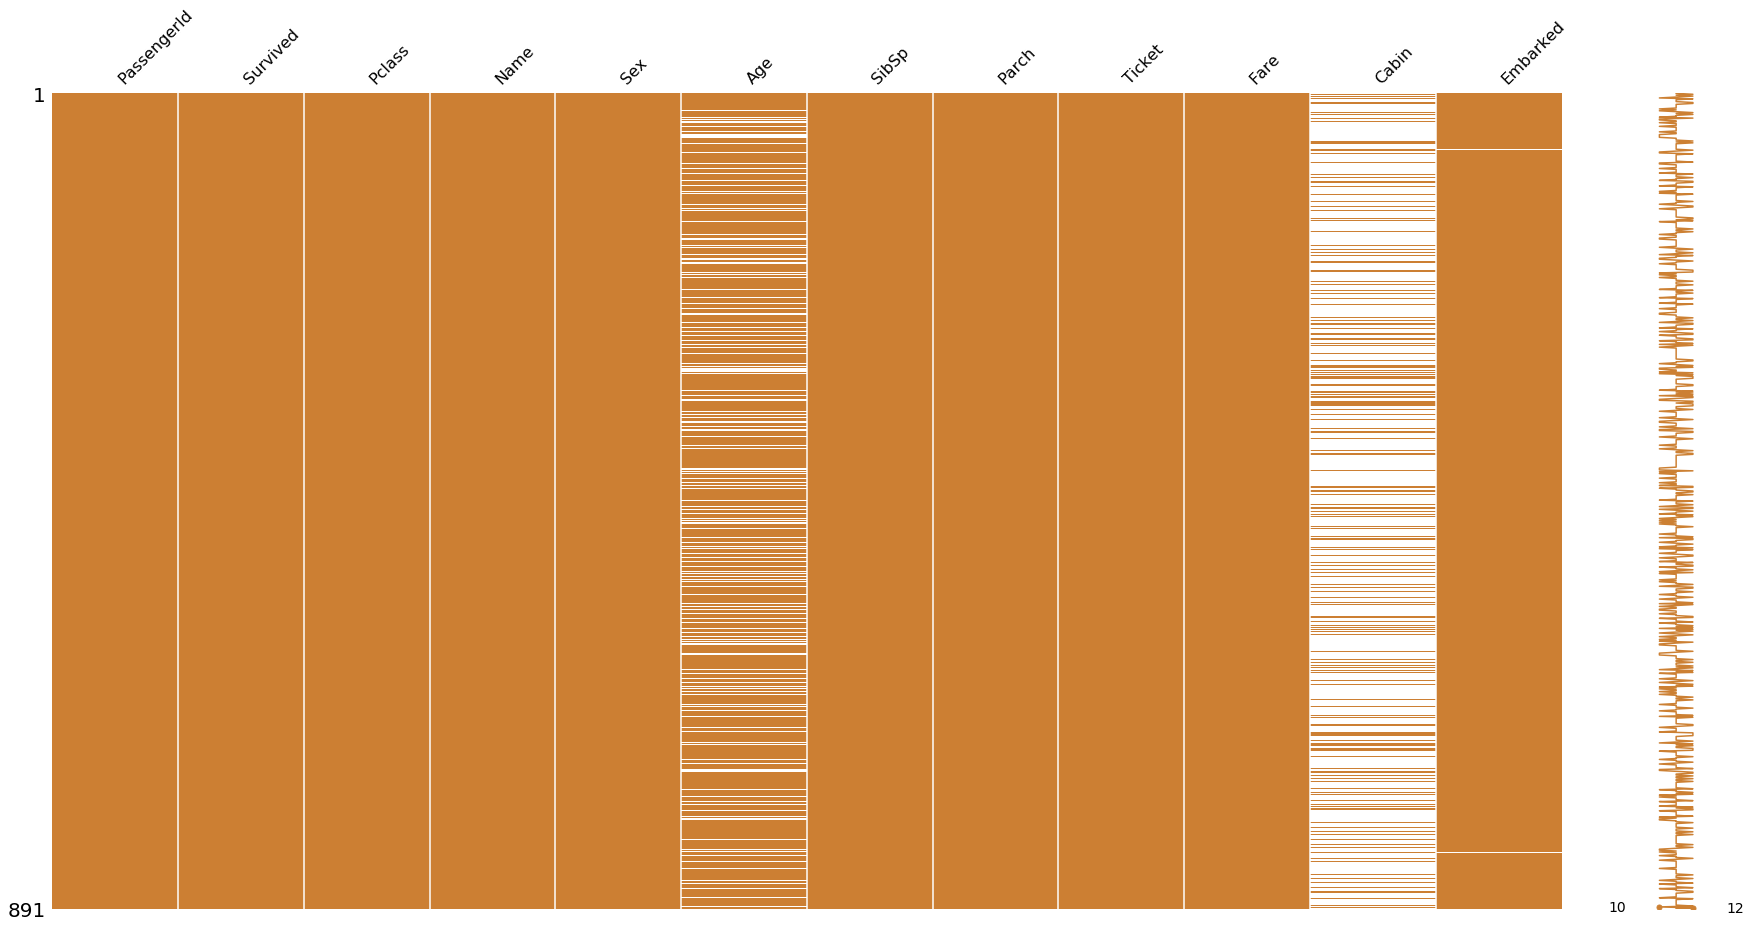

In [11]:
msno.matrix(df = pd_train.iloc[:, :],
            figsize = (30, 15),
            color = (0.8, 0.5, 0.2))

# 5. Data Preprocessing

### 5.1 Name

In [12]:
pd_train.Name.describe()

count                         891
unique                        891
top       Chapman, Mr. John Henry
freq                            1
Name: Name, dtype: object

In [13]:
def name_change(df):
    df['NameA'] = df['Name'].str.extract('([A-Za-z]+)\.',
                                         expand = False)
    return df

pd_train = name_change(pd_train)
pd_test = name_change(pd_test)

In [14]:
def name_change(df):
    LE = preprocessing.LabelEncoder()
    df['NameA'] = LE.fit_transform(df['NameA']) 
    return df

pd_train = name_change(pd_train)
pd_test = name_change(pd_test)

pd_train.drop('Name',
              axis = 1,
              inplace = True)
pd_test.drop('Name',
             axis = 1,
             inplace = True)

### 5.2 Sex

In [15]:
pd_train.Sex.describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [16]:
def sex_change(df):
    LE = preprocessing.LabelEncoder()
    df['Sex'] = LE.fit_transform(df['Sex']) 
    return df

pd_train = sex_change(pd_train)
pd_test = sex_change(pd_test)

### 5.3 Embarked

In [17]:
pd_train.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [18]:
pd_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
pd_train.Embarked = pd_train.Embarked.fillna('S')

In [20]:
def embarked_change(df):
    LE = preprocessing.LabelEncoder()
    df['Embarked'] = LE.fit_transform(df['Embarked']) 
    return df

pd_train = embarked_change(pd_train)
pd_test = embarked_change(pd_test)

### 5.4 Age

In [21]:
pd_train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
def process_age(df):
    df['Age'] = df['Age'].fillna(pd_train.Pclass.mean())
    return df

pd_train = process_age(pd_train)
pd_test = process_age(pd_test)

In [23]:
pd_train['AgeA'] = pd.qcut(pd_train['Age'], 5)
print(pd_train[['AgeA', 'Survived']].groupby(['AgeA'],
                                             as_index = False).mean())

             AgeA  Survived
0  (0.419, 2.309]  0.333333
1   (2.309, 20.5]  0.429487
2    (20.5, 28.0]  0.362637
3    (28.0, 38.0]  0.434286
4    (38.0, 80.0]  0.372881


In [24]:
age_group = [pd_train, pd_test]

for dataset in age_group:
    dataset.loc[dataset['Age'] <= 2, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 2) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 28), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 38), 'Age'] = 3
    dataset.loc[dataset['Age'] > 38, 'Age'] = 4
    dataset['AgeA'] = dataset['Age'].astype(int)
    
pd_train.drop('Age',
              axis = 1,
              inplace = True)
pd_test.drop('Age',
             axis = 1,
             inplace = True)

### 5.5 Cabin

In [25]:
pd_train.Cabin.describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [26]:
def cabin_change(df):
    df['CabinA'] = df['Cabin'].str.extract('([A-Z]+)',
                                           expand = False)
    return df

pd_train = cabin_change(pd_train)
pd_test = cabin_change(pd_test)

In [27]:
pd_train.CabinA.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: CabinA, dtype: int64

In [28]:
pd_train.CabinA = pd_train.Cabin.fillna('C')

In [29]:
pd_test.CabinA.value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: CabinA, dtype: int64

In [30]:
pd_test.CabinA = pd_test.Cabin.fillna('C')

In [31]:
def cabin_change(df):
    LE = preprocessing.LabelEncoder()
    df['CabinA'] = LE.fit_transform(df['CabinA']) 
    return df

pd_train = cabin_change(pd_train)
pd_test = cabin_change(pd_test)

pd_train.drop('Cabin',
              axis = 1,
              inplace = True)
pd_test.drop('Cabin',
             axis = 1,
             inplace = True)

### 5.6 Fare

In [32]:
pd_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [33]:
pd_test['Fare'].fillna(pd_test.groupby('Pclass')['Fare'].transform('median'),
                       inplace = True)

In [34]:
pd_train['FareA'] = pd.qcut(pd_train['Fare'], 5)
print(pd_train[['FareA', 'Survived']].groupby(['FareA'],
                                              as_index = False).mean())

               FareA  Survived
0    (-0.001, 7.854]  0.217877
1      (7.854, 10.5]  0.201087
2     (10.5, 21.679]  0.424419
3   (21.679, 39.688]  0.444444
4  (39.688, 512.329]  0.642045


In [35]:
fare_group = [pd_train, pd_test]

for dataset in fare_group:
    dataset.loc[dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare'] = 3
    dataset.loc[dataset['Fare'] > 39.688, 'Fare'] = 4
    dataset['FareA'] = dataset['Fare'].astype(int)
    
pd_train.drop('Fare',
              axis = 1,
              inplace = True)
pd_test.drop('Fare',
             axis = 1,
             inplace = True)

### 5.7 Data Info

In [36]:
pd_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
NameA          0
AgeA           0
CabinA         0
FareA          0
dtype: int64

In [37]:
pd_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
NameA          0
AgeA           0
CabinA         0
FareA          0
dtype: int64

In [38]:
pd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Embarked       891 non-null int32
NameA          891 non-null int32
AgeA           891 non-null int32
CabinA         891 non-null int32
FareA          891 non-null int32
dtypes: int32(6), int64(5), object(1)
memory usage: 62.7+ KB


In [39]:
pd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Embarked       418 non-null int32
NameA          418 non-null int32
AgeA           418 non-null int32
CabinA         418 non-null int32
FareA          418 non-null int32
dtypes: int32(6), int64(4), object(1)
memory usage: 26.2+ KB


In [40]:
pd_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Embarked,NameA,AgeA,CabinA,FareA
0,1,0,3,1,1,0,A/5 21171,2,12,2,48,0
1,2,1,1,0,1,0,PC 17599,0,13,3,82,4
2,3,1,3,0,0,0,STON/O2. 3101282,2,9,2,48,1
3,4,1,1,0,1,0,113803,2,13,3,56,4
4,5,0,3,1,0,0,373450,2,12,3,48,1


In [41]:
pd_test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Embarked,NameA,AgeA,CabinA,FareA
0,892,3,1,0,0,330911,1,5,3,21,0
1,893,3,0,1,0,363272,2,6,4,21,0
2,894,2,1,0,0,240276,1,5,4,21,1
3,895,3,1,0,0,315154,2,5,2,21,1
4,896,3,0,1,1,3101298,2,6,2,21,2


### 6. Data Normalization

In [42]:
pd_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Embarked', 'NameA', 'AgeA', 'CabinA', 'FareA'],
      dtype='object')

In [43]:
pd_train.describe()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,NameA,AgeA,CabinA,FareA
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,0.523008,0.381594,1.536476,11.221100,2.167228,54.570146,2.004489
std,257.353842,0.486592,0.836071,0.477990,1.102743,0.806057,0.791503,1.864947,1.202097,23.652835,1.400635
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,9.000000,1.000000,48.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,0.000000,0.000000,2.000000,12.000000,2.000000,48.000000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,1.000000,0.000000,2.000000,12.000000,3.000000,48.000000,3.000000
max,891.000000,1.000000,3.000000,1.000000,8.000000,6.000000,2.000000,16.000000,4.000000,147.000000,4.000000


- 최소값(min)과 최대값(max) 사이에서 간격이 큰 변수를 대상으로 정규화 진행

In [44]:
def feature_scale(df):
    SS = preprocessing.StandardScaler().fit(df[['CabinA']])
                                                #'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'NameA', 'AgeA', 'FareA'
    df[['CabinA']] = SS.transform(df[['CabinA']])
    return df

pd_train = feature_scale(pd_train)
pd_test = feature_scale(pd_test)

# 7. Data Visualize

### 7.1 Pairplot

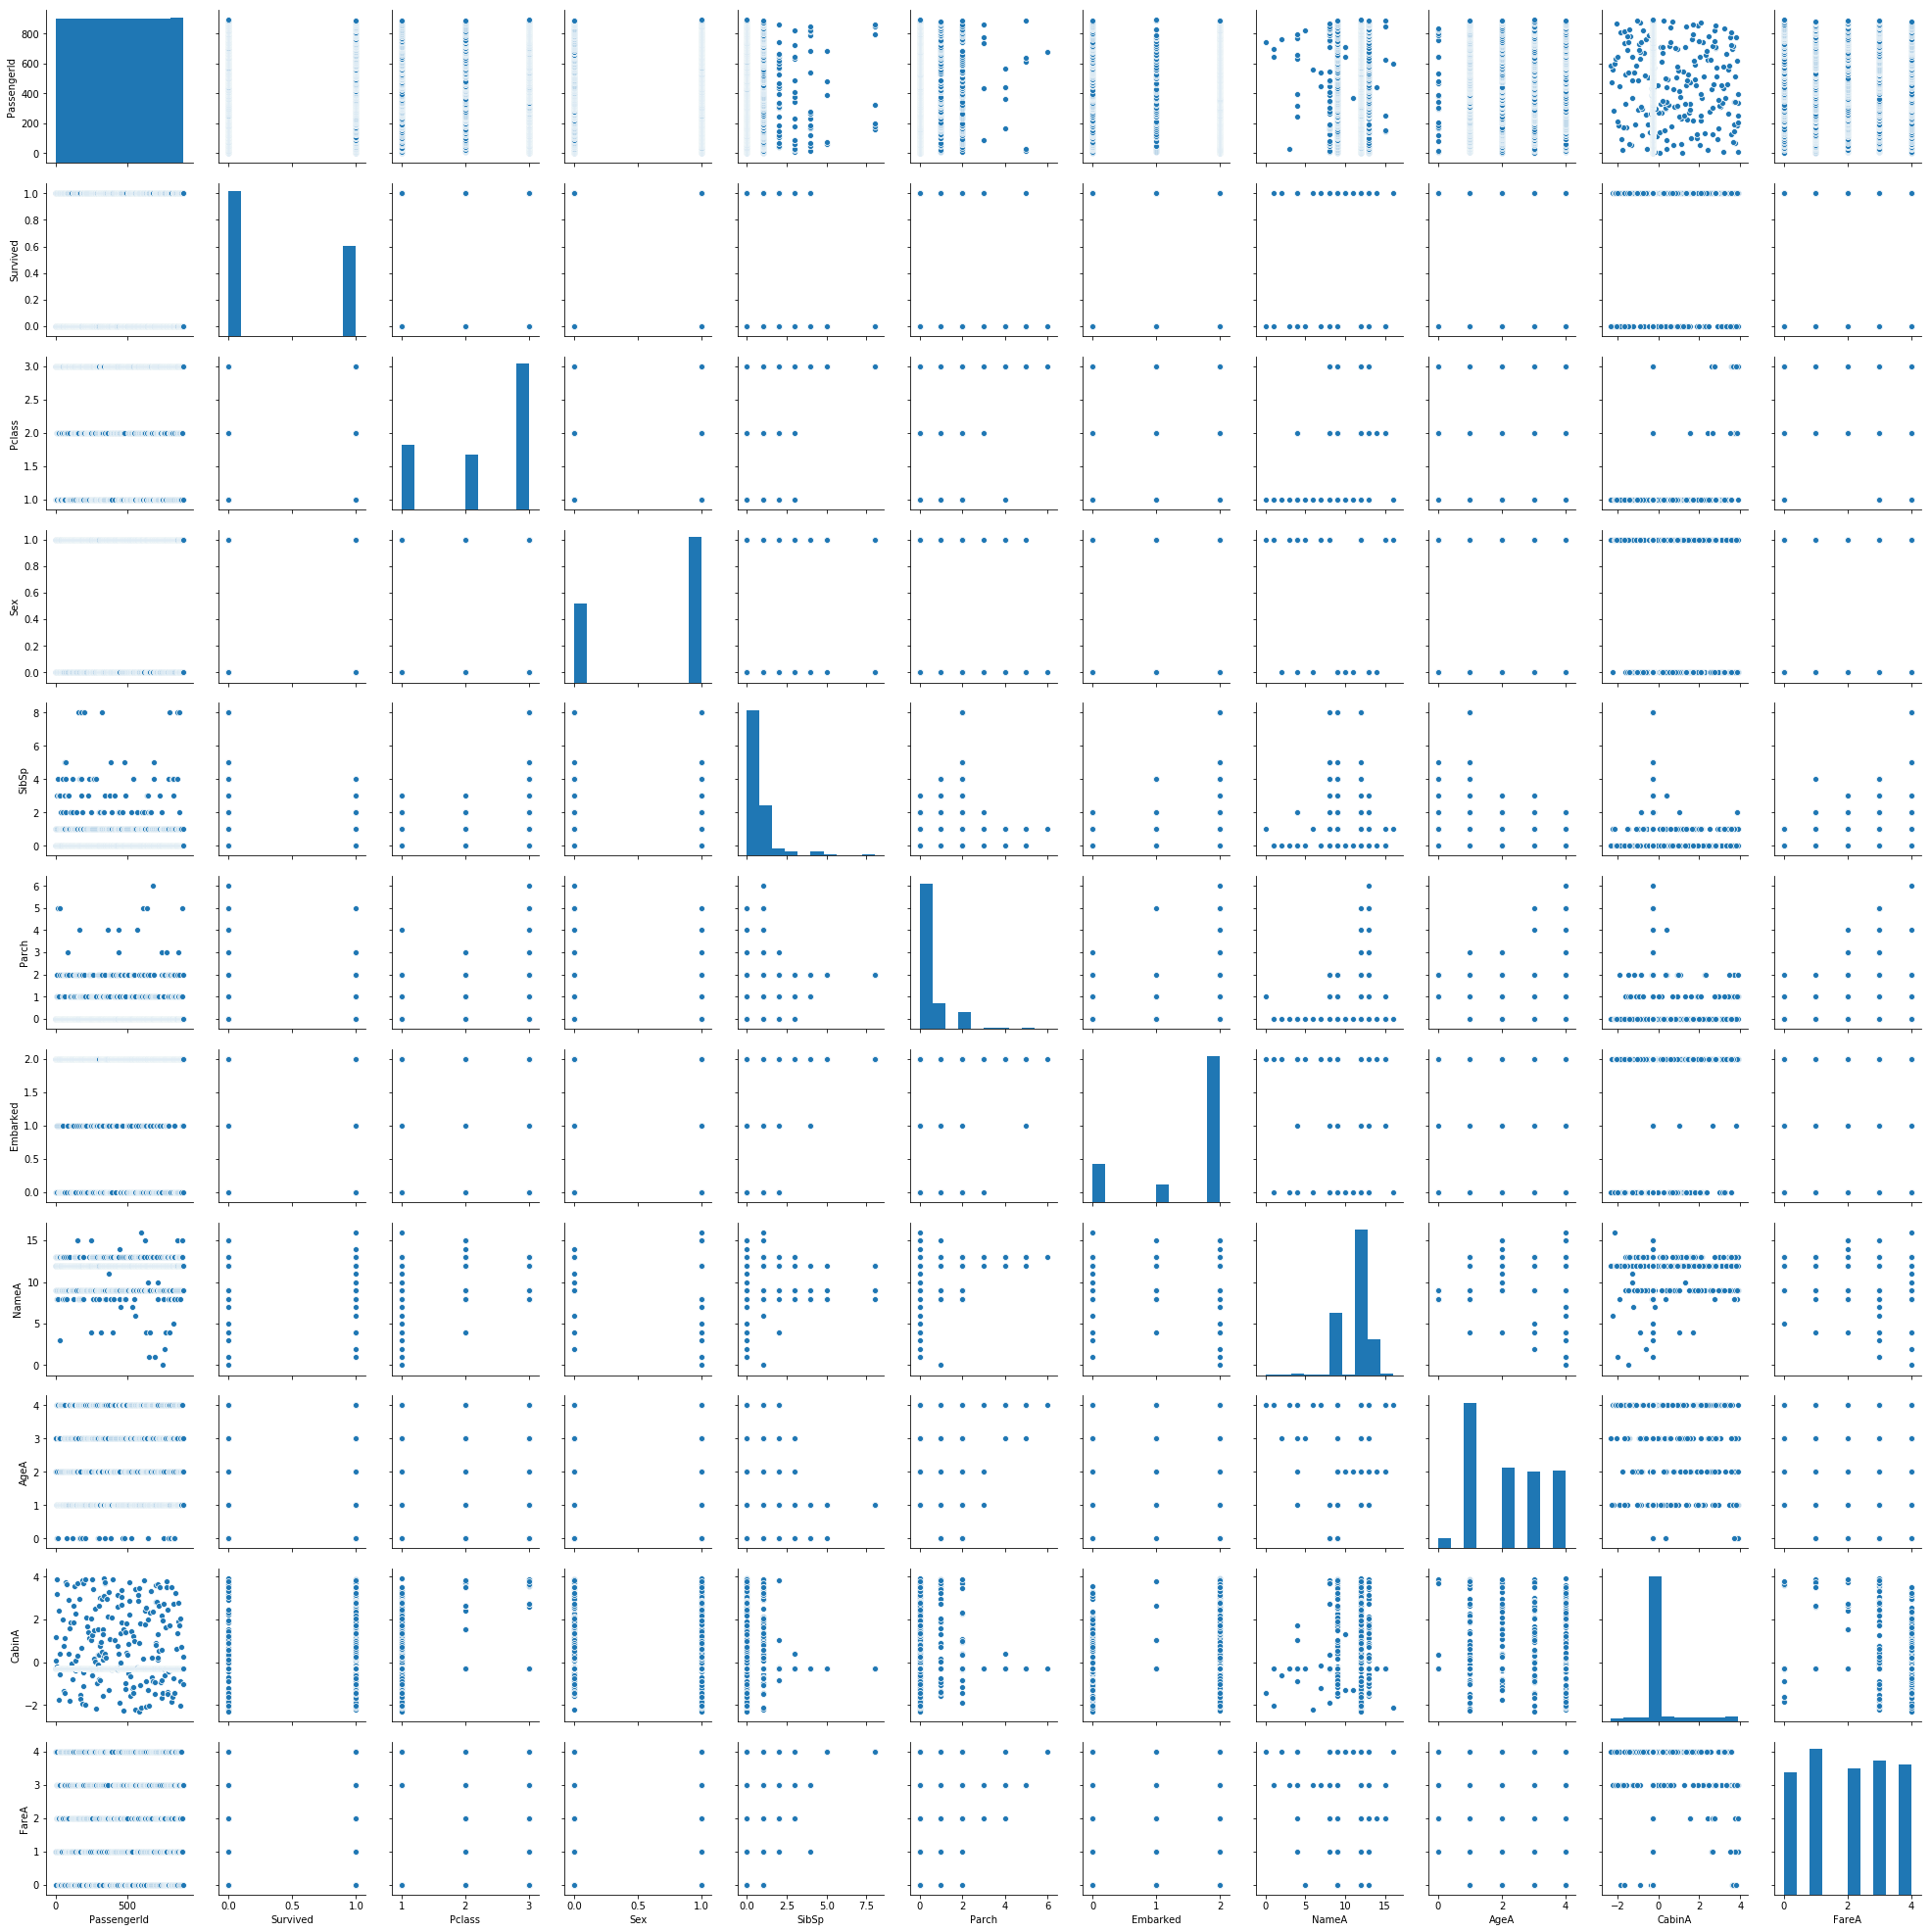

In [45]:
sns.pairplot(pd_train)
plt.show()

### 7.2 Correlation Analysis

### 7.2.1 Correlation Table

In [46]:
pd_train.corr()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,NameA,AgeA,CabinA,FareA
PassengerId,1.000000,-0.005007,-0.035144,0.042939,-0.057527,-0.001652,0.013128,0.021692,0.041669,-0.018661,-0.006761
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.035322,0.081629,-0.167675,-0.201345,0.003473,0.173286,0.317300
Pclass,-0.035144,-0.338481,1.000000,0.131900,0.083081,0.018443,0.162098,0.045541,-0.345437,-0.242997,-0.703533
Sex,0.042939,-0.543351,0.131900,1.000000,-0.114631,-0.245489,0.108262,0.256407,0.022507,-0.101665,-0.246021
SibSp,-0.057527,-0.035322,0.083081,-0.114631,1.000000,0.414838,0.068230,-0.191786,-0.192347,-0.004940,0.357117
Parch,-0.001652,0.081629,0.018443,-0.245489,0.414838,1.000000,0.039798,-0.119721,-0.060133,0.022286,0.350789
Embarked,0.013128,-0.167675,0.162098,0.108262,0.068230,0.039798,1.000000,0.066462,0.059123,0.025475,-0.112649
NameA,0.021692,-0.201345,0.045541,0.256407,-0.191786,-0.119721,0.066462,1.000000,0.221054,0.014969,-0.101465
AgeA,0.041669,0.003473,-0.345437,0.022507,-0.192347,-0.060133,0.059123,0.221054,1.000000,0.107726,0.186408
CabinA,-0.018661,0.173286,-0.242997,-0.101665,-0.004940,0.022286,0.025475,0.014969,0.107726,1.000000,0.189851


### 7.2.2 Correlation Map

In [47]:
def plot_correlation_map(df):
    corr = pd_train.corr()
    _, ax = plt.subplots(figsize = (12, 10))
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    _ = sns.heatmap(
        corr, 
        cmap = cmap, 
        cbar_kws = {'shrink': .9}, 
        ax = ax, 
        annot = True, 
        annot_kws = {'fontsize': 12}
        )

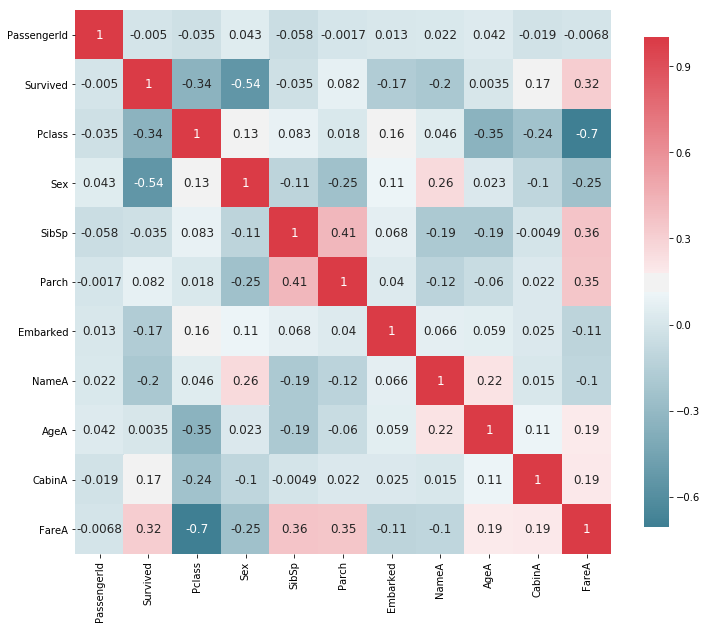

In [48]:
plot_correlation_map(pd_train)

### 7.2.3 Coefficient of Correlation
> 표본의 상관계수(r)
- -1 <= r < 1
- |r| → 1에 가까우면 강한 직선의 관계가 있음
- |r| → 0에 가까우면 직선의 관계가 없음

### 7.2.3.1 Example of Hypothesis Setting : Survived vs Sex

In [49]:
stats.pearsonr(pd_train.Survived,
               pd_train.Sex)

(-0.5433513806577553, 1.406066130879517e-69)

> 결과
- r(상관계수) = -0.543
- 귀무가설 → Survived(생존)와 Sex(성별) 간에는 상관관계(직선의 관계)가 없음
- 대립가설 → Survived(생존)와 Sex(성별) 간에는 상관관계(직선의 관계)가 있음
- pvalue(유의확률) = 0.000
- 대립가설로 Survived(생존)와 Sex(성별) 간에는 통계적인 유의한 즉, 상관관계가 있는 것으로 나타남(직선의 관계가 약간 있음)

### 8. Featrue Setting : Train Dataset

In [50]:
feature = pd_train[['Pclass',
                    'Sex',
                    'SibSp',
                    'Parch',
                    'Embarked',
                    'NameA',
                    'AgeA',
                    'CabinA',
                    'FareA']]

In [51]:
target = pd_train[['Survived']]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(feature,
                                                    target,
                                                    test_size = 0.3,
                                                    random_state = 0)

print(X_train.shape,
      X_test.shape,
      y_train.shape,
      y_test.shape)

(623, 9) (268, 9) (623, 1) (268, 1)


### 9. Example Parameter Settings : RandomForest Algorithm
> 파라미터 적용 전/후 결과 비교 → 값이 작을수록 더 좋음
- RMSE A Model(randomforest_no_gridsearch) = 0.453
- RMSE B Model(randomforest_ok_gridsearch) = 0.432

### 9.1 No Parameter Optimization Progress

In [56]:
randomforest_no_gridsearch = RandomForestClassifier()
randomforest_no_gridsearch.fit(X_train, y_train)

# Check RMSE
titanic_randomforest_no_gridsearch_predict = randomforest_no_gridsearch.predict(X_test)
titanic_randomforest_no_gridsearch_rmse = np.sqrt(mse(titanic_randomforest_no_gridsearch_predict,
                                                      y_test))
titanic_randomforest_no_gridsearch_rmse

0.4530164242022743

### 9.2 Parameter Optimization Progress

In [85]:
best_parameter = {'n_estimators': [100, 200, 300, 400, 500],
                  'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth': [4,5,6,7,8],
                  'criterion': ['gini', 'entropy'],
                  'random_state': [0, 10, 100, 1000]}

In [86]:
randomforest_ok_gridsearch = RandomForestClassifier()
randomforest_ok_gridsearch = GridSearchCV(estimator = randomforest_ok_gridsearch,
                                          param_grid = best_parameter,
                                          cv = 3)
randomforest_ok_gridsearch.fit(X_train, y_train)

# Check RMSE
titanic_randomforest_ok_gridsearch_predict = randomforest_ok_gridsearch.predict(X_test)
titanic_randomforest_ok_gridsearch_rmse = np.sqrt(mse(titanic_randomforest_ok_gridsearch_predict,
                                                      y_test))
titanic_randomforest_ok_gridsearch_rmse

0.43193421279068006

### 9.2.1 Check for Best Results Combinations of Hyperparameters

In [57]:
print('GridSearchCV를 이용한 RandomForest Algorithm 최적 매개변수 ==> \n{}'.format(randomforest_ok_gridsearch.best_params_))

GridSearchCV를 이용한 RandomForest Algorithm 최적 매개변수 ==> 
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100, 'random_state': 10}


### 9.2.2 Validate the Estimator with the Best Results Hyperparameter

In [58]:
print('GridSearchCV를 이용한 RandomForest Algorithm 최고 성능 모델 ==> \n{}'.format(randomforest_ok_gridsearch.best_estimator_))

GridSearchCV를 이용한 RandomForest Algorithm 최고 성능 모델 ==> 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)


# 10. Example of Variable Importance : RandomForest Algorithm

In [61]:
print('Feature Importance of RandomForest : \n{}'.format(randomforest_ok_gridsearch.best_estimator_.feature_importances_))

Feature Importance of RandomForest : 
[0.12277514 0.32665761 0.07655974 0.02911579 0.03180799 0.20838644
 0.05615615 0.08283445 0.06570671]


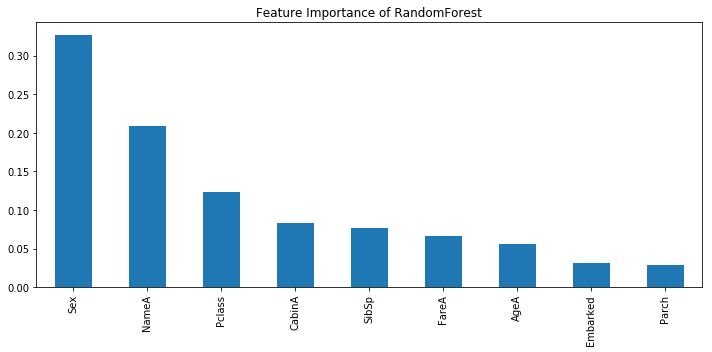

In [62]:
coef = pd.Series(randomforest_ok_gridsearch.best_estimator_.feature_importances_,
                 index = X_train.columns).sort_values(ascending = False)
plt.figure(figsize=(10, 5))
coef.head(25).plot(kind = 'bar')
plt.title('Feature Importance of RandomForest')
plt.tight_layout()

# 10. Modeling : Algorithm Select

In [63]:
logisticregression_parameters = {'penalty': ['l1', 'l2']}, {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}, {'max_iter': range(100, 1000)}, {'C': values}

logisticregression_ok_gridsearch = LogisticRegression()
logisticregression_ok_gridsearch = GridSearchCV(logisticregression_ok_gridsearch,
                                                logisticregression_parameters,
                                                cv = kfold)
logisticregression_ok_gridsearch.fit(X_train, y_train)
logisticregression_ok_gridsearch_predict = logisticregression_ok_gridsearch.predict(X_test)
logisticregression_ok_gridsearch_score = logisticregression_ok_gridsearch.score(X_test,
                                                                                y_test)
print(metrics.classification_report(y_test,
                                    logisticregression_ok_gridsearch_predict))
print('Accuracy for LogisticreGression on CV data :', accuracy_score(y_test,
                                                                     logisticregression_ok_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       168
           1       0.73      0.72      0.73       100

   micro avg       0.80      0.80      0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268

Accuracy for LogisticreGression on CV data : 0.7985074626865671


In [64]:
supportvectormachine_parameters = {'kernel': ['rbf'], 'C': values,
                                   'kernel': ['gamma'], 'C': values,
                                   'kernel': ['linear'], 'C': values}

supportvectormachine_ok_gridsearch = SVC()
supportvectormachine_ok_gridsearch = GridSearchCV(supportvectormachine_ok_gridsearch,
                                                  supportvectormachine_parameters,
                                                  cv = kfold)
supportvectormachine_ok_gridsearch.fit(X_train, y_train)
supportvectormachine_ok_gridsearch_predict = supportvectormachine_ok_gridsearch.predict(X_test)
supportvectormachine_ok_gridsearch_score = supportvectormachine_ok_gridsearch.score(X_test,
                                                                                    y_test)
print(metrics.classification_report(y_test,
                                    supportvectormachine_ok_gridsearch_predict))
print('Accuracy for SupportVectorMachine on CV data :', accuracy_score(y_test,
                                                                       supportvectormachine_ok_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       168
           1       0.72      0.71      0.71       100

   micro avg       0.79      0.79      0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268

Accuracy for SupportVectorMachine on CV data : 0.7873134328358209


In [65]:
perceptron_parameters = {'alpha': 10.0 ** -np.arange(1, 7),
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}

perceptron_ok_gridsearch = Perceptron()
perceptron_ok_gridsearch = GridSearchCV(perceptron_ok_gridsearch,
                                        perceptron_parameters,                                      
                                        cv = kfold)
perceptron_ok_gridsearch.fit(X_train, y_train)
perceptron_ok_gridsearch_predict = perceptron_ok_gridsearch.predict(X_test)
perceptron_ok_gridsearch_score = perceptron_ok_gridsearch.score(X_test,
                                                                y_test)
print(metrics.classification_report(y_test,
                                    perceptron_ok_gridsearch_predict))
print('Accuracy for Perceptron on CV data :', accuracy_score(y_test,
                                                             perceptron_ok_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.87      0.64      0.74       168
           1       0.58      0.84      0.69       100

   micro avg       0.71      0.71      0.71       268
   macro avg       0.72      0.74      0.71       268
weighted avg       0.76      0.71      0.72       268

Accuracy for Perceptron on CV data : 0.7126865671641791


c:\users\dgkim1108\anaconda3\envs\tfgpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [66]:
multilayerperceptron_parameters = {'alpha': 10.0 ** -np.arange(1, 5),
                                   'hidden_layer_sizes': range(1, 10),
                                   'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}

multilayerperceptron_ok_gridsearch = MLPClassifier()
multilayerperceptron_ok_gridsearch = GridSearchCV(multilayerperceptron_ok_gridsearch,
                                                  multilayerperceptron_parameters,                                                      
                                                  cv = kfold)
multilayerperceptron_ok_gridsearch.fit(X_train, y_train)
multilayerperceptron_ok_gridsearch_predict = multilayerperceptron_ok_gridsearch.predict(X_test)
multilayerperceptron_ok_gridsearch_score = multilayerperceptron_ok_gridsearch.score(X_test,
                                                                                    y_test)
print(metrics.classification_report(y_test,
                                    multilayerperceptron_ok_gridsearch_predict))
print('Accuracy for MultiLayerPerceptron on CV data :', accuracy_score(y_test,
                                                                       multilayerperceptron_ok_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       168
           1       0.72      0.75      0.74       100

   micro avg       0.80      0.80      0.80       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

Accuracy for MultiLayerPerceptron on CV data : 0.7985074626865671


c:\users\dgkim1108\anaconda3\envs\tfgpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [67]:
decisiontree_parameters = {'criterion': ['gini', 'entropy']}, {'splitter': ['random', 'best']}

decisiontree_ok_gridsearch = DecisionTreeClassifier()
decisiontree_ok_gridsearch = GridSearchCV(decisiontree_ok_gridsearch,
                                          decisiontree_parameters,                                                      
                                          cv = kfold)
decisiontree_ok_gridsearch.fit(X_train, y_train)
decisiontree_ok_gridsearch_predict = decisiontree_ok_gridsearch.predict(X_test)
decisiontree_ok_gridsearch_score = decisiontree_ok_gridsearch.score(X_test,
                                                                    y_test)
print(metrics.classification_report(y_test,
                                    decisiontree_ok_gridsearch_predict))
print('Accuracy for DecisionTree on CV data :', accuracy_score(y_test,
                                                               decisiontree_ok_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       168
           1       0.74      0.66      0.70       100

   micro avg       0.79      0.79      0.79       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.79      0.78       268

Accuracy for DecisionTree on CV data : 0.7873134328358209


In [68]:
gaussiannavebayes_parameters = {'var_smoothing': 10.0 ** -np.arange(1, 15)}

gaussiannavebayes_ok_gridsearch = GaussianNB()
gaussiannavebayes_ok_gridsearch = GridSearchCV(gaussiannavebayes_ok_gridsearch,
                                               gaussiannavebayes_parameters,                                                      
                                               cv = kfold)
gaussiannavebayes_ok_gridsearch.fit(X_train, y_train)
gaussiannavebayes_ok_gridsearch_predict = gaussiannavebayes_ok_gridsearch.predict(X_test)
gaussiannavebayes_ok_gridsearch_score = gaussiannavebayes_ok_gridsearch.score(X_test,
                                                                              y_test)
print(metrics.classification_report(y_test,
                                    gaussiannavebayes_ok_gridsearch_predict))
print('Accuracy for GaussianNaiveBayes on CV data :', accuracy_score(y_test,
                                                                     gaussiannavebayes_ok_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       168
           1       0.68      0.79      0.73       100

   micro avg       0.78      0.78      0.78       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.79      0.78      0.79       268

Accuracy for GaussianNaiveBayes on CV data : 0.7835820895522388


In [69]:
stochasticgradientdescent_parameters = {'alpha': 10.0 ** -np.arange(1, 5)}

stochasticgradientdescent_ok_gridsearch = SGDClassifier()
stochasticgradientdescent_ok_gridsearch = GridSearchCV(stochasticgradientdescent_ok_gridsearch,
                                                       stochasticgradientdescent_parameters,                                                      
                                                       cv = kfold)
stochasticgradientdescent_ok_gridsearch.fit(X_train, y_train)
stochasticgradientdescent_ok_gridsearch_predict = stochasticgradientdescent_ok_gridsearch.predict(X_test)
stochasticgradientdescent_ok_gridsearch_score = stochasticgradientdescent_ok_gridsearch.score(X_test,
                                                                                              y_test)
print(metrics.classification_report(y_test,
                                    stochasticgradientdescent_ok_gridsearch_predict))
print('Accuracy for StochasticGradientDescent on CV data :', accuracy_score(y_test,
                                                                            stochasticgradientdescent_ok_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       168
           1       0.89      0.40      0.55       100

   micro avg       0.76      0.76      0.76       268
   macro avg       0.81      0.69      0.69       268
weighted avg       0.79      0.76      0.73       268

Accuracy for StochasticGradientDescent on CV data : 0.7574626865671642


c:\users\dgkim1108\anaconda3\envs\tfgpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [70]:
knearestneighbors_parameters = {'n_neighbors': range(1, 100)}

knearestneighbors_ok_gridsearch = KNeighborsClassifier()
knearestneighbors_ok_gridsearch = GridSearchCV(knearestneighbors_ok_gridsearch,
                                               knearestneighbors_parameters,                                                      
                                               cv = kfold)
knearestneighbors_ok_gridsearch.fit(X_train, y_train)
knearestneighbors_ok_gridsearch_predict = knearestneighbors_ok_gridsearch.predict(X_test)
knearestneighbors_ok_gridsearch_score = knearestneighbors_ok_gridsearch.score(X_test,
                                                                              y_test)
print(metrics.classification_report(y_test,
                                    knearestneighbors_ok_gridsearch_predict))
print('Accuracy for KNearestNeighbors on CV data :', accuracy_score(y_test,
                                                                    knearestneighbors_ok_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       168
           1       0.86      0.64      0.74       100

   micro avg       0.83      0.83      0.83       268
   macro avg       0.84      0.79      0.80       268
weighted avg       0.83      0.83      0.82       268

Accuracy for KNearestNeighbors on CV data : 0.8283582089552238


In [71]:
randomforest_parameters = {'n_estimators': [100, 200, 300, 400, 500],
                           'max_features': ['auto', 'sqrt', 'log2'],
                           'max_depth': [4,5,6,7,8],
                           'criterion': ['gini', 'entropy'],
                           'random_state': [0, 10, 100, 1000]}

randomforest_ok_gridsearch = RandomForestClassifier()
randomforest_ok_gridsearch = GridSearchCV(randomforest_ok_gridsearch,
                                          randomforest_parameters,                                                      
                                          cv = kfold)
randomforest_ok_gridsearch.fit(X_train, y_train)
randomforest_ok_gridsearch_predict = randomforest_ok_gridsearch.predict(X_test)
randomforest_ok_gridsearch_score = randomforest_ok_gridsearch.score(X_test,
                                                                    y_test)
print(metrics.classification_report(y_test,
                                    randomforest_ok_gridsearch_predict))
print('Accuracy for RandomForest on CV data :', accuracy_score(y_test,
                                                               randomforest_ok_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       168
           1       0.77      0.73      0.75       100

   micro avg       0.82      0.82      0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268

Accuracy for RandomForest on CV data : 0.8171641791044776


In [72]:
gradientboosting_parameters = {'n_estimators': range(1, 100)}, {'learning_rate': np.arange(0.1, 10.1, 0.1)}, {'min_samples_split': np.linspace(0.1, 0.5, 12)}, {'min_samples_leaf': np.linspace(0.1, 0.5, 12)}

gradientboosting_ok_gridsearch = GradientBoostingClassifier()
gradientboosting_ok_gridsearch = GridSearchCV(gradientboosting_ok_gridsearch,
                                              gradientboosting_parameters,                                                      
                                              cv = kfold)
gradientboosting_ok_gridsearch.fit(X_train, y_train)
gradientboosting_ok_gridsearch_predict = gradientboosting_ok_gridsearch.predict(X_test)
gradientboosting_ok_gridsearch_score = gradientboosting_ok_gridsearch.score(X_test,
                                                                            y_test)
print(metrics.classification_report(y_test,
                                    gradientboosting_ok_gridsearch_predict))
print('Accuracy for GradientBoosting on CV data :', accuracy_score(y_test,
                                                                   gradientboosting_ok_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       168
           1       0.76      0.75      0.75       100

   micro avg       0.82      0.82      0.82       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268

Accuracy for GradientBoosting on CV data : 0.8171641791044776


c:\users\dgkim1108\anaconda3\envs\tfgpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [73]:
adaboost_parameters = {'n_estimators': range(1, 100)}, {'learning_rate': np.arange(0.1, 10.1, 0.1)}

adaboost_ok_gridsearch = AdaBoostClassifier()
adaboost_ok_gridsearch = GridSearchCV(adaboost_ok_gridsearch,
                                      adaboost_parameters,                                                      
                                      cv = kfold)
adaboost_ok_gridsearch.fit(X_train, y_train)
adaboost_ok_gridsearch_predict = adaboost_ok_gridsearch.predict(X_test)
adaboost_ok_gridsearch_score = adaboost_ok_gridsearch.score(X_test,
                                                            y_test)
print(metrics.classification_report(y_test,
                                    adaboost_ok_gridsearch_predict))
print('Accuracy for AdaBoost on CV data :', accuracy_score(y_test,
                                                           adaboost_ok_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       168
           1       0.76      0.75      0.75       100

   micro avg       0.82      0.82      0.82       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268

Accuracy for AdaBoost on CV data : 0.8171641791044776


c:\users\dgkim1108\anaconda3\envs\tfgpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [74]:
extratree_parameters = {'n_estimators' : range(1, 100)}

extratree_ok_gridsearch = ExtraTreesClassifier()
extratree_ok_gridsearch = GridSearchCV(extratree_ok_gridsearch,
                                       extratree_parameters,                                                
                                       cv = kfold)
extratree_ok_gridsearch.fit(X_train, y_train)
extratree_ok_gridsearch_predict = extratree_ok_gridsearch.predict(X_test)
extratree_ok_gridsearch_score = extratree_ok_gridsearch.score(X_test,
                                                              y_test)
print(metrics.classification_report(y_test,
                                    extratree_ok_gridsearch_predict))
print('Accuracy for ExtraTree on CV data :', accuracy_score(y_test,
                                                            extratree_ok_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       168
           1       0.79      0.70      0.74       100

   micro avg       0.82      0.82      0.82       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.82      0.82      0.81       268

Accuracy for ExtraTree on CV data : 0.8171641791044776


In [75]:
xgboost_parameters = {'n_estimators': [100, 200, 300, 400, 500], 
                      'max_depth': [3, 6, 10],
                      'subsample': [0.2, 0.4, 0.6, 0.8, 1.0],
                      'colsample_bytree': [0.5, 0.6, 0.7],
                      'reg_alpha': [0.01, 0.02, 0.03]}

xgboost_ok_gridsearch = XGBClassifier()
xgboost_ok_gridsearch = GridSearchCV(xgboost_ok_gridsearch,
                                     xgboost_parameters,                                                
                                     cv = kfold)
xgboost_ok_gridsearch.fit(X_train, y_train)
xgboost_ok_gridsearch_predict = xgboost_ok_gridsearch.predict(X_test)
xgboost_ok_gridsearch_score = xgboost_ok_gridsearch.score(X_test,
                                                          y_test)
print(metrics.classification_report(y_test,
                                    xgboost_ok_gridsearch_predict))
print('Accuracy for XGBoost on CV data :', accuracy_score(y_test,
                                                          xgboost_ok_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       168
           1       0.80      0.74      0.77       100

   micro avg       0.84      0.84      0.84       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.84      0.83       268

Accuracy for XGBoost on CV data : 0.835820895522388


# 11. Check Learning Model Performance

In [76]:
models = pd.DataFrame({'Model' : ['LogisticRegression',
                                  'SupportVectorMachine',
                                  'Perceptron',
                                  'MultiLayerPerceptron',
                                  'DecisionTree',
                                  'GaussianNaiveBayes',
                                  'StochasticGradientDescent',
                                  'KNearestNeighbors',
                                  'RandomForest',
                                  'GradientBoosting',
                                  'AdaBoost',
                                  'ExtraTree',
                                  'XGBoost'],
                       'Score' : [logisticregression_ok_gridsearch_score,
                                  supportvectormachine_ok_gridsearch_score,
                                  perceptron_ok_gridsearch_score,
                                  multilayerperceptron_ok_gridsearch_score,
                                  decisiontree_ok_gridsearch_score,
                                  gaussiannavebayes_ok_gridsearch_score,
                                  stochasticgradientdescent_ok_gridsearch_score,
                                  knearestneighbors_ok_gridsearch_score,
                                  randomforest_ok_gridsearch_score,
                                  gradientboosting_ok_gridsearch_score,
                                  adaboost_ok_gridsearch_score,
                                  extratree_ok_gridsearch_score,
                                  xgboost_ok_gridsearch_score]})

models.sort_values(by = 'Score',
                   ascending = False)

,Model,Score
12,XGBoost,0.835821
7,KNearestNeighbors,0.828358
8,RandomForest,0.817164
9,GradientBoosting,0.817164
10,AdaBoost,0.817164
11,ExtraTree,0.817164
0,LogisticRegression,0.798507
3,MultiLayerPerceptron,0.798507
1,SupportVectorMachine,0.787313
4,DecisionTree,0.787313


# 12. Using the Tensorflow

In [77]:
seed = 5
input_size = X_train.shape[1]
learning_rate = 0.01
epochs = 1000

graph = tf.Graph()

with graph.as_default():
    tf.set_random_seed(seed)
    np.random.seed(seed)

    X_input = tf.placeholder(dtype = tf.float32,
                             shape = [None, input_size],
                             name = 'X_input')
    y_input = tf.placeholder(dtype = tf.float32,
                             shape = [None, 1],
                             name = 'y_input')
    
    W1 = tf.Variable(tf.random_normal(shape = [input_size, 1],
                                      seed = seed),
                     name = 'W1')

    b1 = tf.Variable(tf.random_normal(shape = [1],
                                      seed = seed),
                     name = 'b1')
    
    sigm = tf.nn.sigmoid(tf.add(tf.matmul(X_input,
                                          W1),
                                b1), 
                         name = 'pred')
    
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y_input,
                                                                  logits = sigm,
                                                                  name = 'loss'))
    
    train_steps = tf.train.AdamOptimizer(learning_rate).minimize(loss)

    pred = tf.cast(tf.greater_equal(sigm, 0.5),
                   tf.float32,
                   name = 'pred')
    
    acc = tf.reduce_mean(tf.cast(tf.equal(pred, y_input),
                                 tf.float32),
                         name = 'acc')
    
    init_var = tf.global_variables_initializer()

# 13. Prediction of Test Set

In [78]:
pd_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Embarked',
       'NameA', 'AgeA', 'CabinA', 'FareA'],
      dtype='object')

In [79]:
feature_test = pd_test[['Pclass',
                        'Sex',
                        'SibSp',
                        'Parch',
                        'Embarked',
                        'NameA',
                        'AgeA',
                        'CabinA',
                        'FareA']]

In [80]:
train_dict = {X_input: X_train,
              y_input: y_train}

validation_dict = {X_input: X_test,
                   y_input: y_test}

test_dict = {X_input: feature_test}

In [81]:
sess = tf.Session(graph = graph)
sess.run(init_var)

In [82]:
cur_loss = sess.run(loss,
                    feed_dict = train_dict)

train_acc = sess.run(acc,
                     feed_dict = train_dict)

test_acc = sess.run(acc,
                    feed_dict = validation_dict)

print('step 0: loss {0:.5f}, train_acc {1:.2f}%, test_acc {2:.2f}%'.format(cur_loss,
                                                                           100*train_acc,
                                                                           100*test_acc))
for step in range(1, epochs+1):
    writer = tf.summary.FileWriter('C:/Users/dgkim1108/Source/Tensorboard/logs', # tensorboard path
                                   sess.graph)
    sess.run(train_steps,
             feed_dict = train_dict)
    cur_loss = sess.run(loss,
                        feed_dict = train_dict)
    train_acc = sess.run(acc,
                         feed_dict = train_dict)
    test_acc = sess.run(acc,
                        feed_dict = train_dict)
    if step%100 != 0: # print result every 100 steps
        continue
    print('step {3}: loss {0:.5f}, train_acc {1:.2f}%, test_acc {2:.2f}%'.format(cur_loss,
                                                                                 100*train_acc,
                                                                                 100*test_acc,
                                                                                 step))

step 0: loss 0.92398, train_acc 38.84%, test_acc 37.31%
step 100: loss 0.69391, train_acc 61.16%, test_acc 61.16%
step 200: loss 0.69325, train_acc 61.16%, test_acc 61.16%
step 300: loss 0.69243, train_acc 61.32%, test_acc 61.32%
step 400: loss 0.68497, train_acc 64.21%, test_acc 64.21%
step 500: loss 0.68008, train_acc 66.13%, test_acc 66.13%
step 600: loss 0.67694, train_acc 66.13%, test_acc 66.13%
step 700: loss 0.67189, train_acc 67.58%, test_acc 67.58%
step 800: loss 0.66111, train_acc 71.91%, test_acc 71.91%
step 900: loss 0.65312, train_acc 74.00%, test_acc 74.00%
step 1000: loss 0.64459, train_acc 77.21%, test_acc 77.21%


In [83]:
result = xgboost_ok_gridsearch.predict(feature_test)
submission = pd.DataFrame({'PassengerId': pd_test['PassengerId'], 'Survived': result})
submission["Survived"] = result
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [84]:
submission.to_csv("XGBoost_Algorithm_Model_20190719.csv",
                  index = False)